
# Phân tích và nhận xét mô hình dữ liệu

Trong notebook này, chúng ta sẽ thảo luận và trả lời các câu hỏi liên quan đến cách nhận xét mô hình dữ liệu thông qua các biểu đồ và phương pháp khác nhau. Nội dung bao gồm:

1. **Nhận xét mô hình qua các biểu đồ Residual Plot, Resi Plot và Distribution Plot.**
2. **Phân biệt giữa mô hình tuyến tính và phi tuyến tính.**
3. **Xác định mối quan hệ giữa hai biến có tuyến tính hay phi tuyến tính.**
4. **Khái niệm tổ hợp tuyến tính và ứng dụng.**


## 1. Cách nhận xét mô hình dựa vào các biểu đồ Residual Plot, Resi Plot và Distribution Plot


### Residual Plot
Residual plot (biểu đồ phần dư) hiển thị sự khác biệt giữa giá trị dự đoán và giá trị thực tế. Nó là công cụ quan trọng để kiểm tra mức độ phù hợp của mô hình.

#### Cách sử dụng Residual Plot để chuẩn đoán mô hình:
- Nếu phần dư phân tán ngẫu nhiên xung quanh trục 0, mô hình phù hợp.
- Nếu phần dư có cấu trúc (ví dụ: hình parabola), điều đó cho thấy mô hình cần cải thiện hoặc mối quan hệ giữa các biến không tuyến tính.

#### Ví dụ (Python):


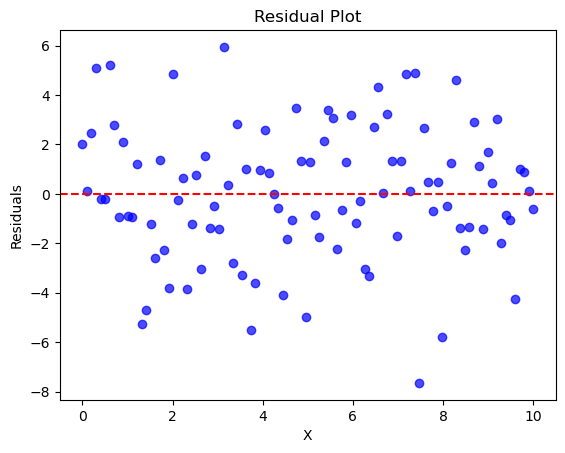

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Tạo dữ liệu giả lập
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.normal(0, 3, size=100)

# Hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Tính phần dư (residuals)
residuals = y - y_pred

# Biểu đồ Residual Plot
plt.scatter(X, residuals, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.show()


- Dựa vào đồ thị phần dư (residual plot) mà bạn đã chia sẻ, có thể rút ra một số nhận xét:

    + Phân phối phần dư ngẫu nhiên xung quanh giá trị 0: Đồ thị cho thấy phần dư phân bố khá ngẫu nhiên xung quanh đường ngang 0 mà không có mẫu hình rõ ràng. Điều này cho thấy mô hình có thể là phù hợp với dữ liệu.
    + Không có xu hướng hệ thống: Không có mẫu hay xu hướng hệ thống rõ ràng trong đồ thị. Nếu có một xu hướng hoặc mẫu như hình sin, tăng dần hoặc giảm dần, đó có thể là dấu hiệu của một mô hình không phù hợp hoặc mô hình chưa bao quát hết các mối quan hệ phi tuyến.




### Resi Plot
Resi Plot thường được dùng để trực quan hóa độ phù hợp của mô hình, tương tự Residual Plot nhưng có thể bổ sung thêm các thông tin về mật độ dữ liệu.

### Distribution Plot
Distribution plot kiểm tra sự phân phối của giá trị thực tế và dự đoán. Nếu hai phân phối tương tự nhau, mô hình hoạt động tốt.


In [ ]:

import seaborn as sns

# Biểu đồ Distribution Plot
sns.kdeplot(y, color="red", label="Actual", fill=True)
sns.kdeplot(y_pred, color="blue", label="Predicted", fill=True)
plt.title("Distribution Plot")
plt.legend()
plt.show()


## 2. Tuyến tính và phi tuyến tính là gì?


### Mối quan hệ tuyến tính
Một mối quan hệ được gọi là tuyến tính nếu nó có thể được biểu diễn dưới dạng một đường thẳng trong không gian đồ thị. Công thức chung:
\(
y = a + bx
\)
- \(a\): Hệ số chặn.
- \(b\): Độ dốc.

### Mối quan hệ phi tuyến tính
Mối quan hệ phi tuyến không thể biểu diễn bằng một đường thẳng. Ví dụ:
\(
y = ax^2 + bx + c
\)


In [ ]:

# Dữ liệu tuyến tính và phi tuyến
x = np.linspace(-10, 10, 100)
y_linear = 2 * x + 1
y_nonlinear = x**2

# Biểu đồ
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y_linear, label="Tuyến tính", color="blue")
plt.title("Quan hệ tuyến tính")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y_nonlinear, label="Phi tuyến tính", color="red")
plt.title("Quan hệ phi tuyến")
plt.legend()

plt.show()


## 3. Làm sao để xác định mối quan hệ giữa hai biến có tuyến tính hay phi tuyến tính?


### Phương pháp xác định
1. **Trực quan hóa (Scatter Plot)**:
   Quan sát biểu đồ phân tán để kiểm tra xem dữ liệu có phân bố theo một đường thẳng hay không.

2. **Hệ số tương quan Pearson**:
   - \(r = 1\): Quan hệ tuyến tính dương hoàn hảo.
   - \(r = -1\): Quan hệ tuyến tính âm hoàn hảo.
   - \(r = 0\): Không có quan hệ tuyến tính.

3. **Hệ số Spearman**:
   Đo mối quan hệ đơn điệu (monotonic), hữu ích cho cả tuyến tính và phi tuyến tính.

#### Code ví dụ kiểm tra tuyến tính và phi tuyến:


In [ ]:

from scipy.stats import pearsonr, spearmanr

# Dữ liệu
x = np.linspace(0, 10, 100)
y_linear = 2 * x + 3
y_nonlinear = x**2

# Hệ số tương quan
r_pearson_linear, _ = pearsonr(x, y_linear)
r_pearson_nonlinear, _ = pearsonr(x, y_nonlinear)

r_spearman_linear, _ = spearmanr(x, y_linear)
r_spearman_nonlinear, _ = spearmanr(x, y_nonlinear)

print("Pearson (Linear):", r_pearson_linear)
print("Pearson (Non-linear):", r_pearson_nonlinear)
print("Spearman (Linear):", r_spearman_linear)
print("Spearman (Non-linear):", r_spearman_nonlinear)


### R² (hệ số xác định) là một chỉ số phổ biến để đánh giá mức độ phù hợp của mô hình. Tuy nhiên, trong nhiều trường hợp, chỉ số này không đủ để xác định liệu mô hình có thực sự phù hợp hay không. Để kiểm tra mô hình một cách toàn diện, bạn có thể sử dụng các phương pháp sau thay thế hoặc bổ sung cho R²:
- Công thức $R^2$:
    Công thức chi tiết:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

* $y_i$: là giá trị thực tế của biến phụ thuộc.
* $\hat{y}_i$: là giá trị dự đoán từ mô hình.
* $\bar{y}$: là giá trị trung bình của biến phụ thuộc.
```python
from sklearn.metrics import r2_score

# Dữ liệu giả lập
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

# Tính R^2
r2 = r2_score(y_true, y_pred)
print(f"R^2: {r2}")
```
Công thức tính Adjusted R-squared:

$$
R^2_{adjusted} = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}
$$

Trong đó:
* n là số mẫu (số điểm dữ liệu).
* p là số biến độc lập trong mô hình.
* R² là giá trị R² thông thường được tính từ mô hình.

[Refer-Link](https://xulydinhluong.com/do-phu-hop-mo-hinh-phan-du-hoi-quy/)

## Các công thức thống kê cơ bản

### Trung bình mẫu (Mean)
$$
\bar{X} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

### Phương sai mẫu (Variance)
$$
S^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{X})^2}{n-1}
$$

### Độ lệch chuẩn mẫu (Standard Deviation)
$$
S = \sqrt{S^2}
$$

### Độ lệch trung bình (Mean Deviation)
$$
MD = \frac{\sum_{i=1}^{n} |x_i - \bar{X}|}{n}
$$

### Hệ số biến thiên (Coefficient of Variation)
$$
CV = \frac{S}{\bar{X}} \times 100\%
$$

**Trong đó:**
* $\bar{X}$: Trung bình mẫu
* $S^2$: Phương sai mẫu
* $S$: Độ lệch chuẩn mẫu
* $MD$: Độ lệch trung bình
* $CV$: Hệ số biến thiên
* $x_i$: Giá trị thứ i trong mẫu
* $n$: Số lượng giá trị trong mẫu

## 4. Tổ hợp tuyến tính là gì?


### Định nghĩa
Tổ hợp tuyến tính của các vector hoặc biến là biểu thức dưới dạng:
\(
y = c_1x_1 + c_2x_2 + \dots + c_nx_n
\)
Trong đó:
- \(x_1, x_2, \dots, x_n\): Các vector hoặc biến.
- \(c_1, c_2, \dots, c_n\): Các hệ số.

### Ứng dụng
- Hồi quy tuyến tính: Tổ hợp tuyến tính của các biến đầu vào để dự đoán.
- PCA: Giảm chiều dữ liệu thông qua tổ hợp tuyến tính.

#### Code minh họa:


In [ ]:

# Ví dụ tổ hợp tuyến tính
x1, x2 = 2, 3
c1, c2 = 4, -1

y = c1 * x1 + c2 * x2
print("Tổ hợp tuyến tính:", y)
